# Random Forest und Explainabilty
## Herzerkrankungen

## Die Daten

In [295]:
import pandas as pd
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Verstänglichere Bezeichner

In [296]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

### Kategorische Spalten umwandeln und verständlicher machen

In [297]:
data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [298]:
categorical = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','st_slope','thalassemia']
for c in categorical:
    data[c] = data[c].astype('category')
data.dtypes

age                           int64
sex                        category
chest_pain_type            category
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar        category
rest_ecg                   category
max_heart_rate_achieved       int64
exercise_induced_angina    category
st_depression               float64
st_slope                   category
num_major_vessels             int64
thalassemia                category
target                        int64
dtype: object

In [299]:
data['sex'] = data['sex'].cat.rename_categories({0 : 'female', 1 : 'male'})
data['chest_pain_type'] = data['chest_pain_type'].cat.rename_categories({1 : 'typical angina', 2 : 'atypical angina', 3 : 'non-anginal pain', 4 : 'asymptomatic'})
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].cat.rename_categories({0 : 'lower than 120mg/ml', 1 : 'greater than 120 mg/ml'})
data['rest_ecg'] = data['rest_ecg'].cat.rename_categories({0 : 'normal', 1 : 'ST-T wave abnormality', 2 : 'left ventricular hypertrophy'})
data['exercise_induced_angina'] = data['exercise_induced_angina'].cat.rename_categories({0 : 'no', 1 : 'yes'})
data['st_slope'] = data['st_slope'].cat.rename_categories({1 : 'upsloping', 2 : 'flat', 3 : 'downsloping'})
data['thalassemia'] = data['thalassemia'].cat.rename_categories({1 : 'normal', 2 : 'fixed defect', 3 : 'reversable defect'})
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120 mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [300]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_typical angina,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,fasting_blood_sugar_greater than 120 mg/ml,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,exercise_induced_angina_yes,st_slope_upsloping,st_slope_flat,thalassemia_normal,thalassemia_fixed defect,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


## Das Model

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = .2, random_state=10)

In [302]:
from sklearn.ensemble import RandomForestClassifier
# TODO: Besseres Training
model = RandomForestClassifier(max_depth=100000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


In [303]:
model.max_depth

100000

0.819672131147541
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.76      0.85      0.80        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

[[28  7]
 [ 4 22]]
0.8752747252747253


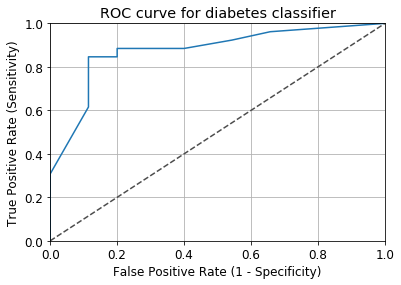

In [304]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
print(model.score(X_test,y_test))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

print(auc(fpr, tpr))

### Ein Baum

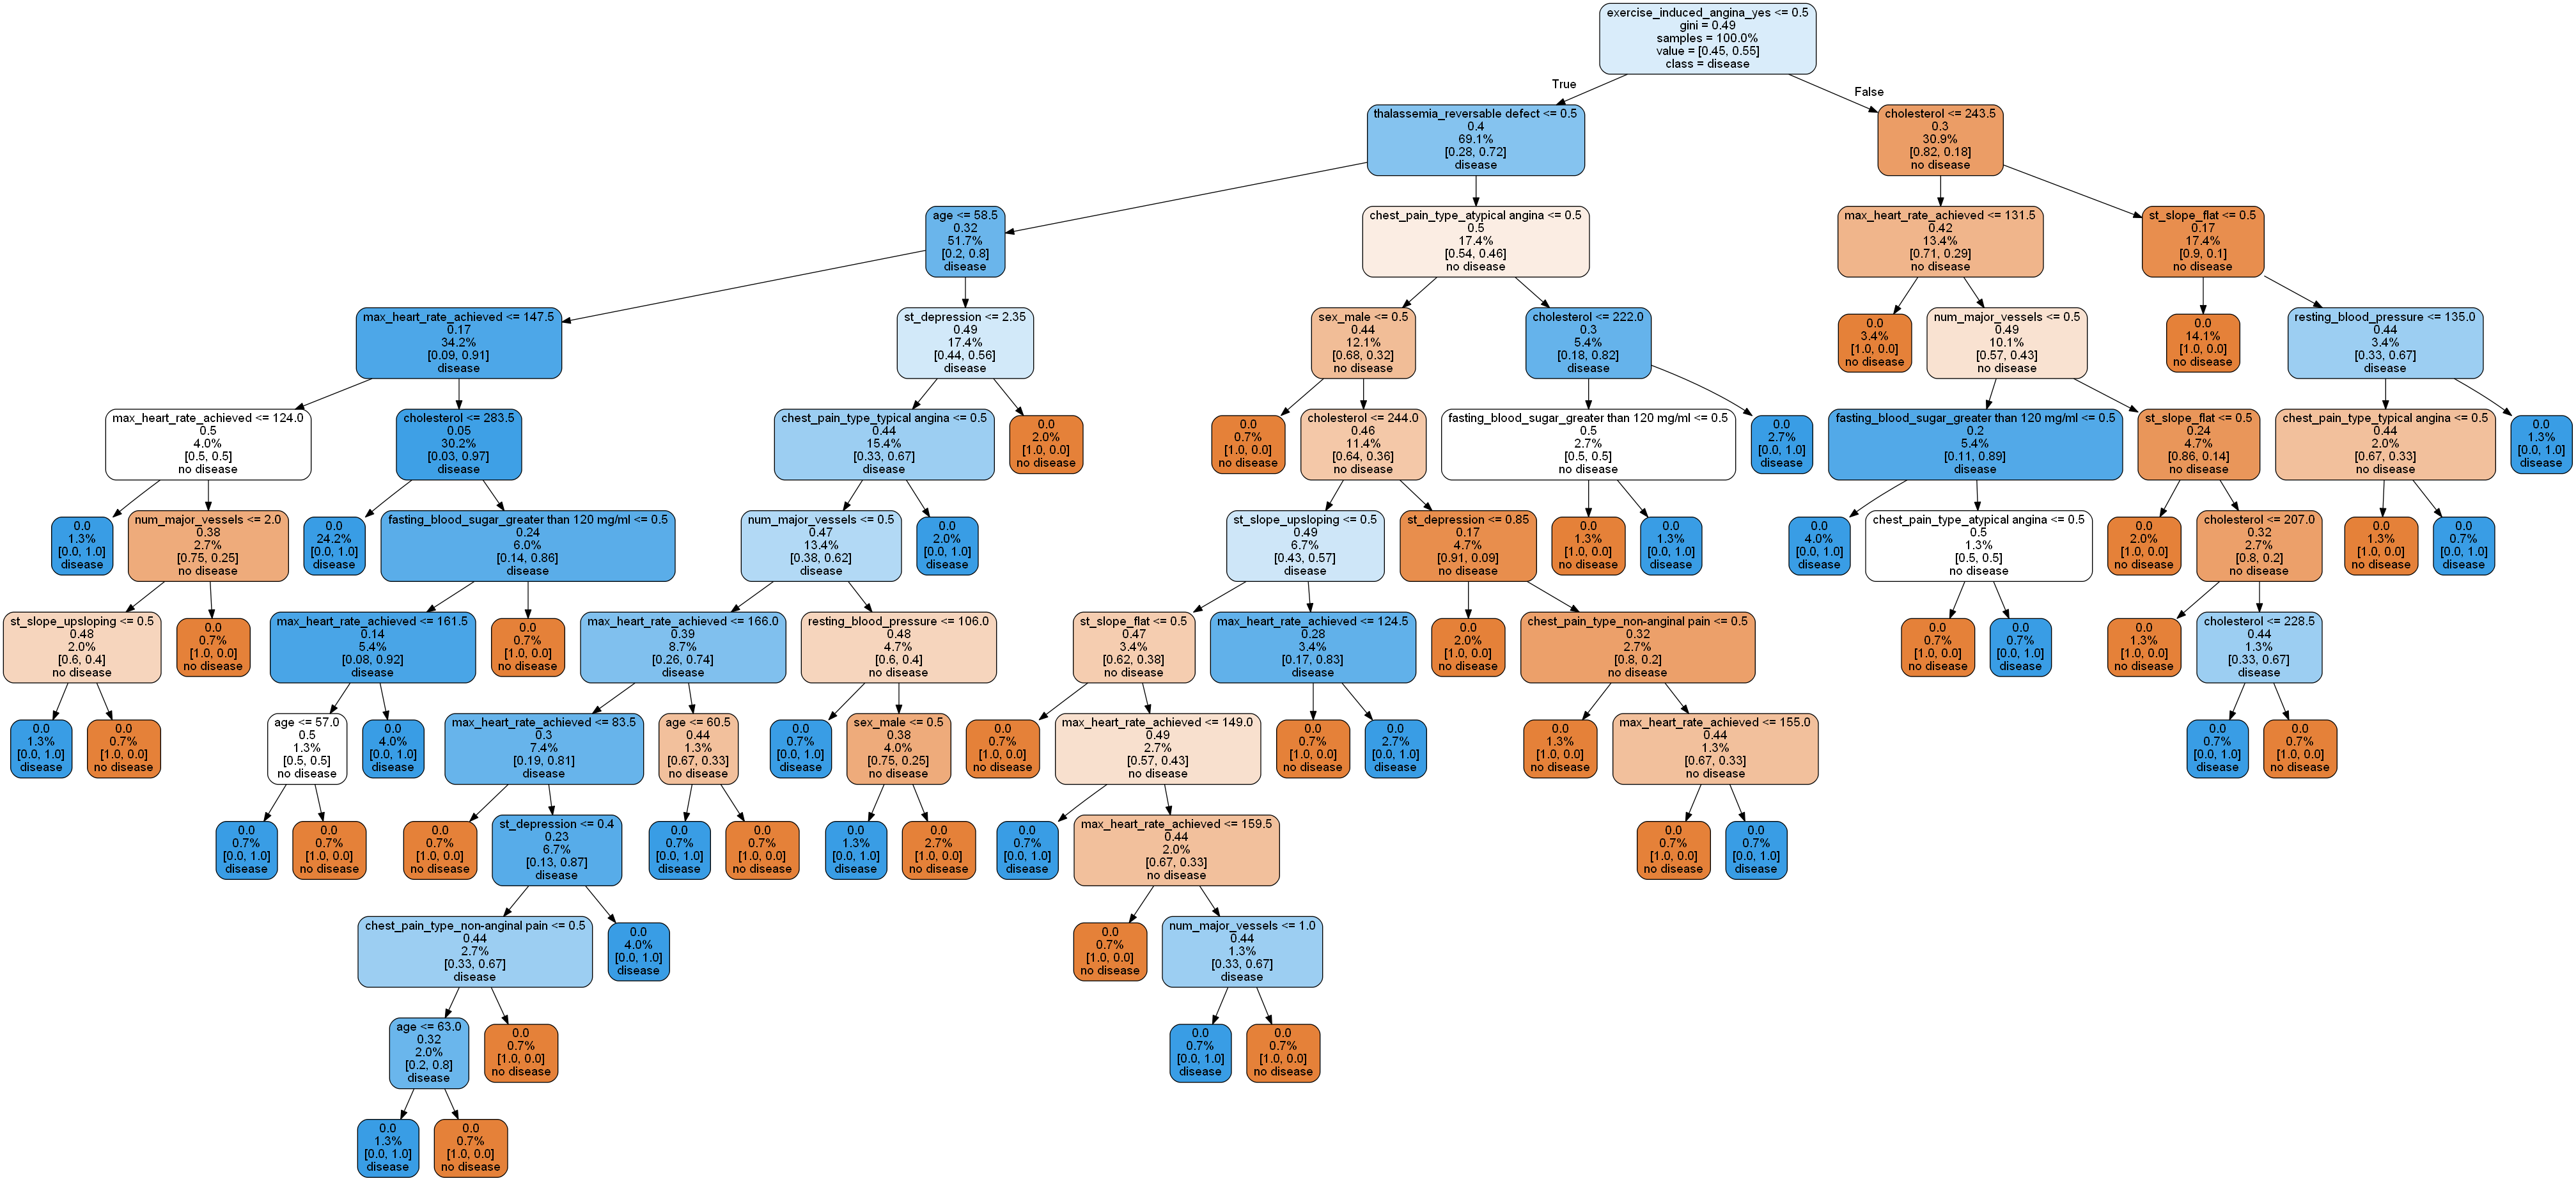

In [305]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values
export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)
graph, = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Image(filename = 'tree.png')

## Explainability

In [306]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0459 ± 0.0435,num_major_vessels
0.0262 ± 0.0262,max_heart_rate_achieved
0.0230 ± 0.0533,st_depression
0.0197 ± 0.0245,thalassemia_fixed defect
0.0164 ± 0.0359,thalassemia_reversable defect
0.0131 ± 0.0482,st_slope_flat
0.0131 ± 0.0435,age
0.0098 ± 0.0262,cholesterol
0.0033 ± 0.0131,sex_male
0 ± 0.0000,fasting_blood_sugar_greater than 120 mg/ml


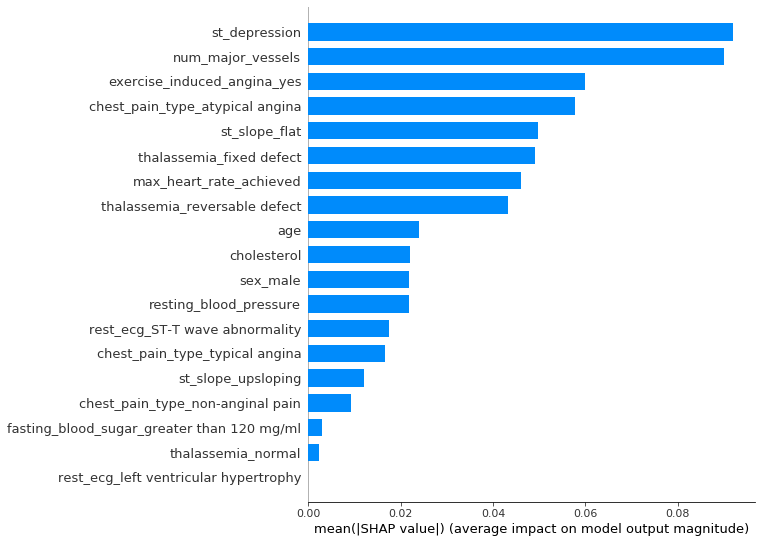

In [307]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


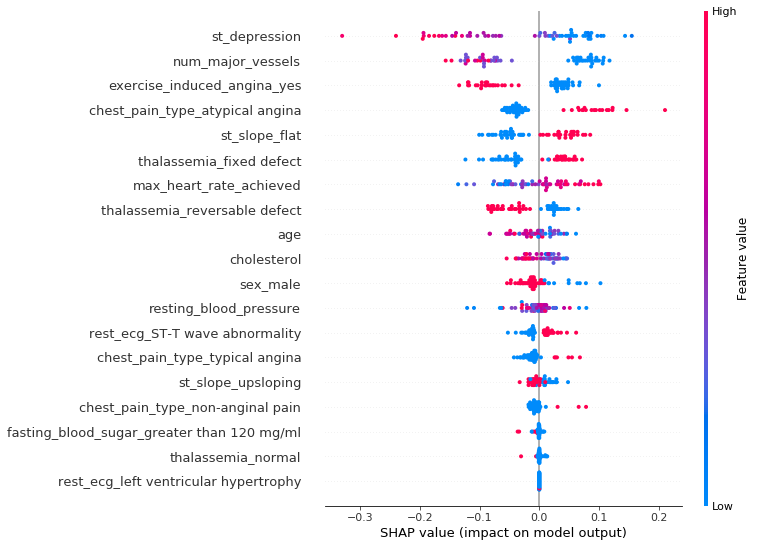

In [308]:
shap.summary_plot(shap_values[1], X_test)

In [309]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [310]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [311]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])
